In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U -q PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':'19a0QHt7Uq3P-IS0b1rmSkUQDFWgFB9_s'})
downloaded.GetContentFile('CovidPeru_29_09_21.csv')

In [6]:
Covid = pd.read_csv('CovidPeru_29_09_21.csv',sep=',',encoding='latin-1')

In [7]:
downloaded = drive.CreateFile({'id':'1OTA5V9unWhdfeD-64vwF1CzY-5RyN98N'})
downloaded.GetContentFile('indexPeru.csv')

In [8]:
Indices= pd.read_csv('indexPeru.csv',sep=',',encoding='latin-1')

In [9]:
Covid

,REGION,MUESTRAS,POSITIVOS,FALLECIDOS
0,AMAZONAS,155690,31512,1253
1,ANCASH,525964,76951,6636
2,APURIMAC,205076,26050,1501
3,AREQUIPA,1229201,114581,9644
4,AYACUCHO,192133,33654,2095
5,CAJAMARCA,525960,65567,4111
6,CALLAO,702622,100455,9945
7,CUSCO,570700,73245,4750
8,HUANCAVELICA,147024,16131,1152
9,HUANUCO,239576,35495,2689


In [10]:
Indices

,REGION,POBLACION,IDH
0,AMAZONAS,397469,0.418
1,ANCASH,1118249,0.516
2,APURIMAC,429283,0.411
3,AREQUIPA,1383158,0.643
4,AYACUCHO,696863,0.433
5,CAJAMARCA,1436281,0.425
6,CALLAO,1044457,0.640
7,CUSCO,1289337,0.512
8,HUANCAVELICA,428225,0.384
9,HUANUCO,811839,0.454


In [11]:
datos=pd.merge(Indices,Covid, on='REGION')

In [12]:
datos.index=datos.REGION.values

In [13]:
datos.drop('REGION',axis=1,inplace=True)

In [14]:
datos

,POBLACION,IDH,MUESTRAS,POSITIVOS,FALLECIDOS
AMAZONAS,397469,0.418,155690,31512,1253
ANCASH,1118249,0.516,525964,76951,6636
APURIMAC,429283,0.411,205076,26050,1501
AREQUIPA,1383158,0.643,1229201,114581,9644
AYACUCHO,696863,0.433,192133,33654,2095
CAJAMARCA,1436281,0.425,525960,65567,4111
CALLAO,1044457,0.640,702622,100455,9945
CUSCO,1289337,0.512,570700,73245,4750
HUANCAVELICA,428225,0.384,147024,16131,1152
HUANUCO,811839,0.454,239576,35495,2689


<Axes: >

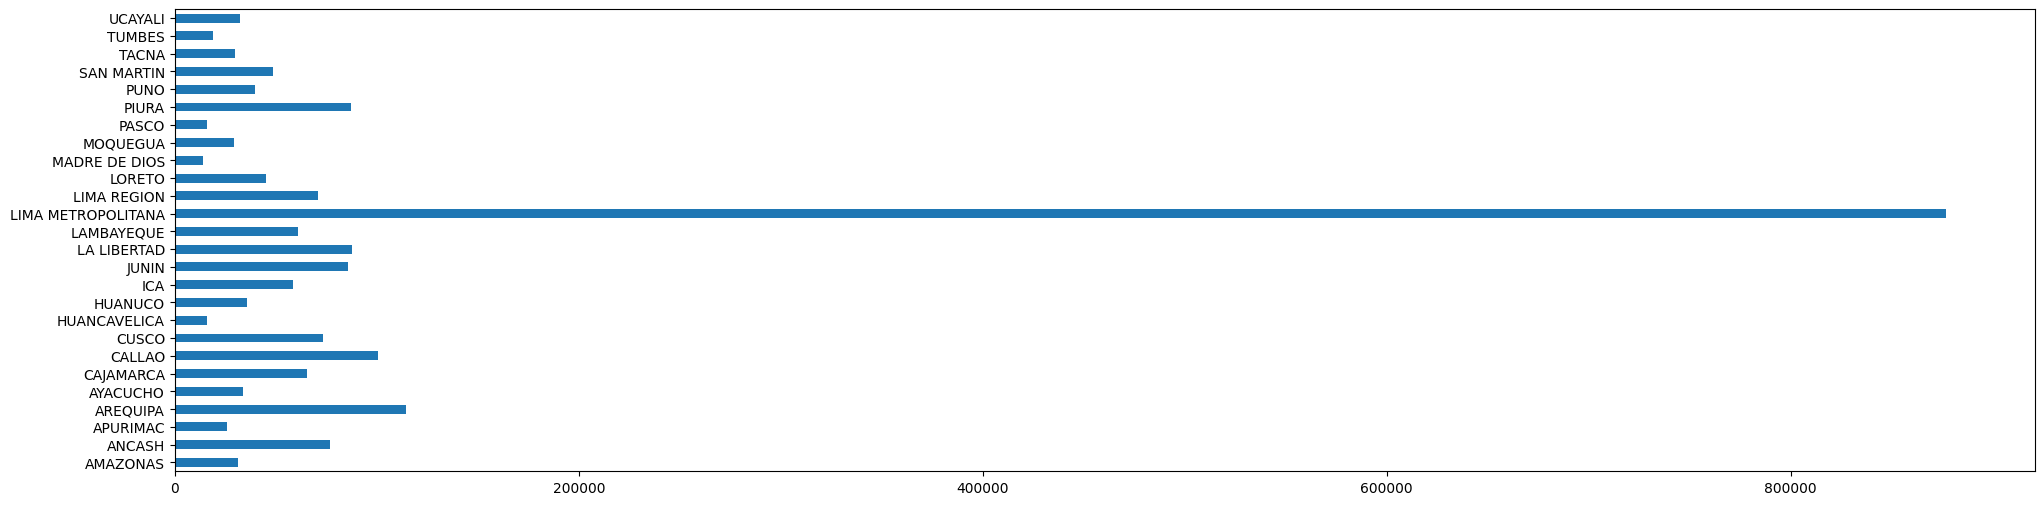

In [15]:
plt.figure(figsize=(24,6))
datos.POSITIVOS.plot(kind='barh')

<Axes: >

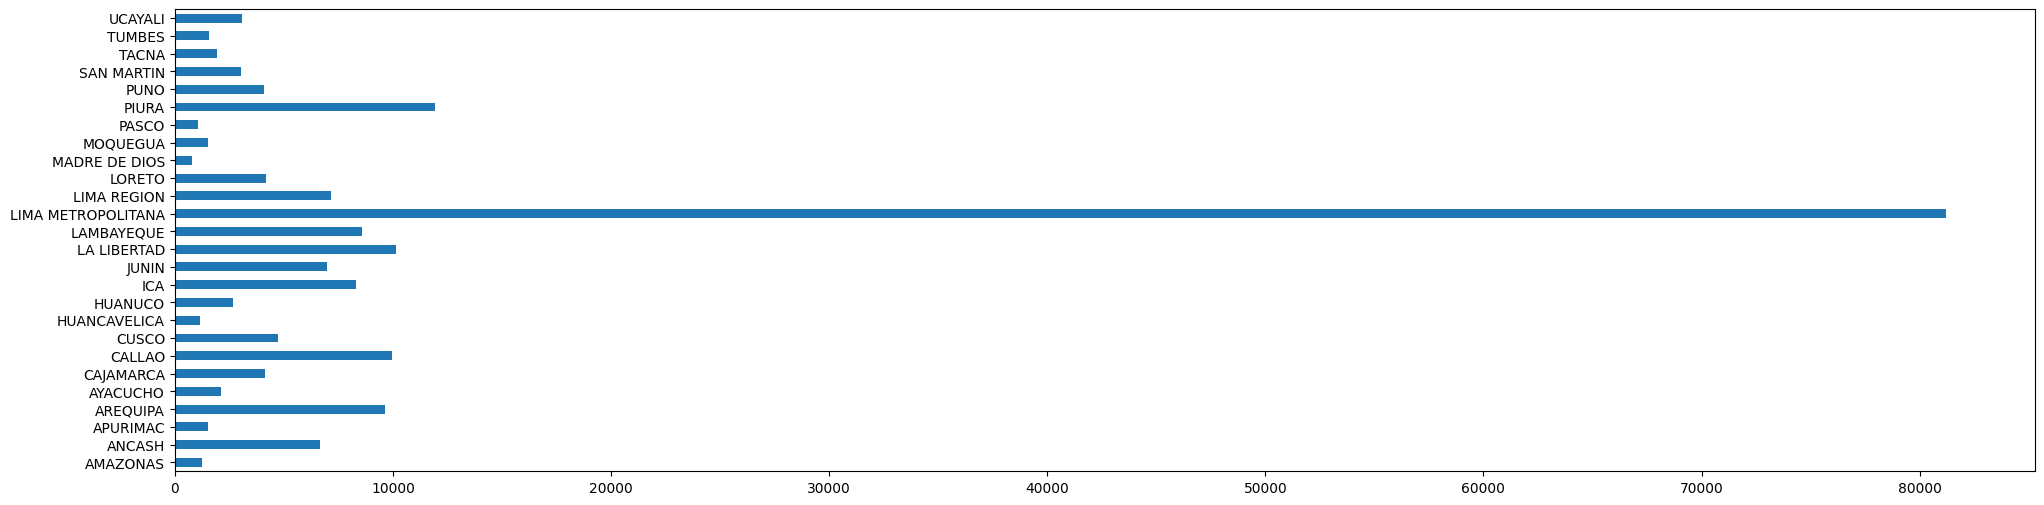

In [16]:
plt.figure(figsize=(24,6))
datos.FALLECIDOS.plot(kind='barh')

In [17]:
datos['Positivos_cada_100mil']=100000*datos.POSITIVOS/datos.POBLACION

<Axes: >

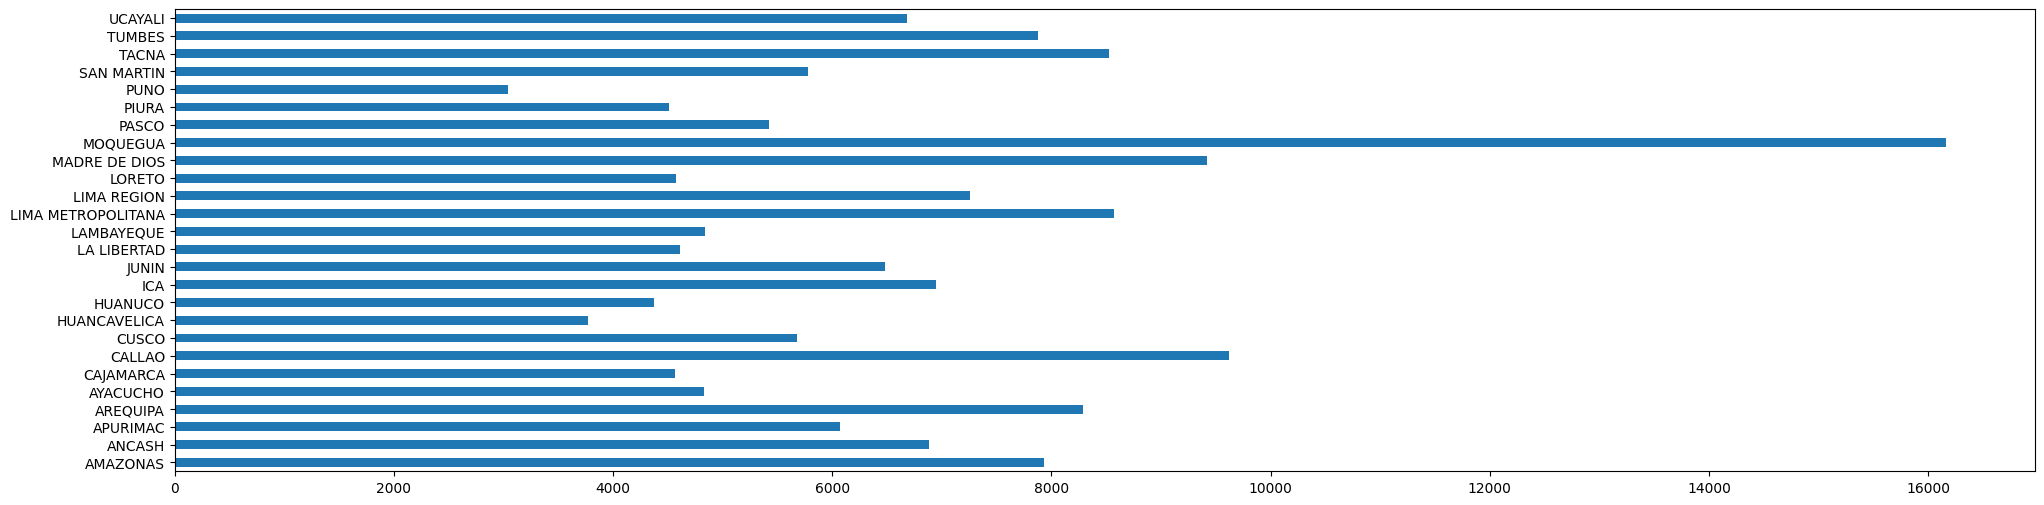

In [18]:
plt.figure(figsize=(24,6))
datos.Positivos_cada_100mil.plot(kind='barh')

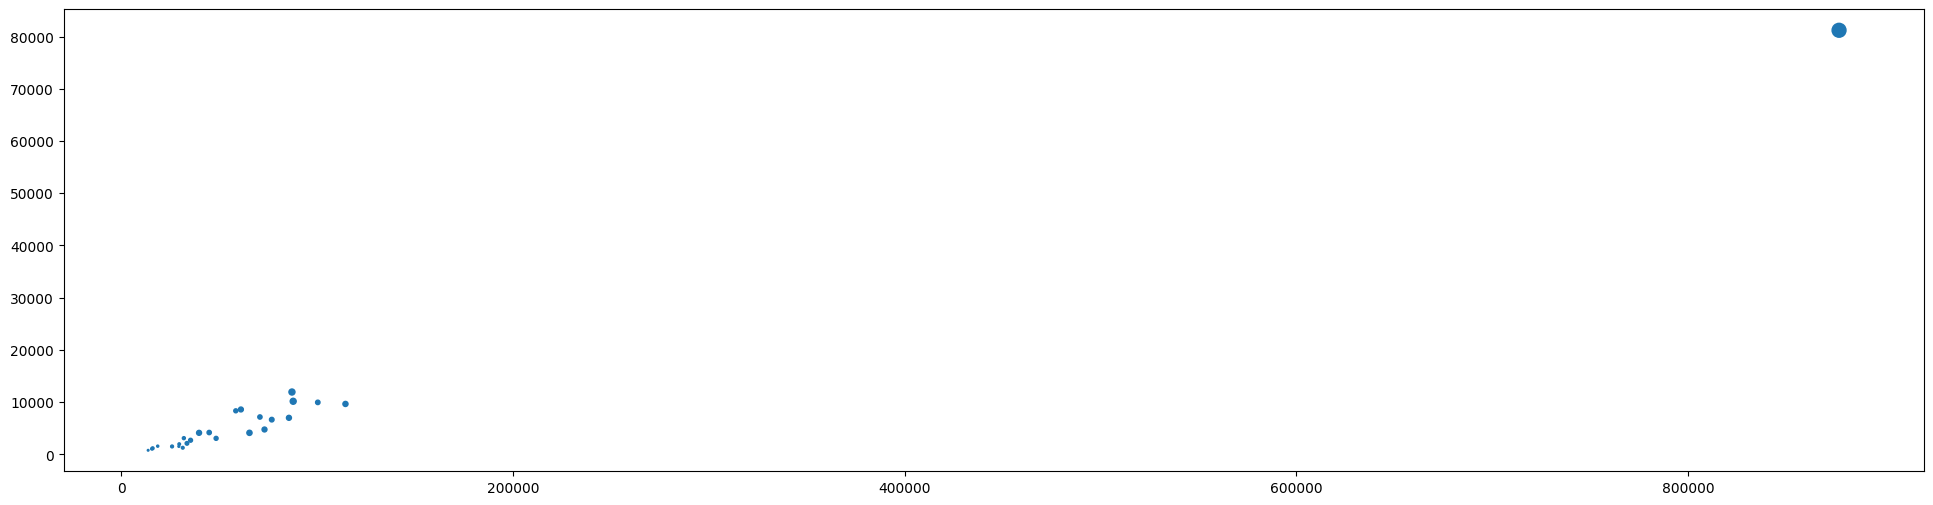

In [19]:
plt.figure(figsize=(24,6))
x=datos.POSITIVOS
y=datos.FALLECIDOS
s=100*datos.POBLACION/datos.POBLACION.max()
plt.scatter(x, y,s)

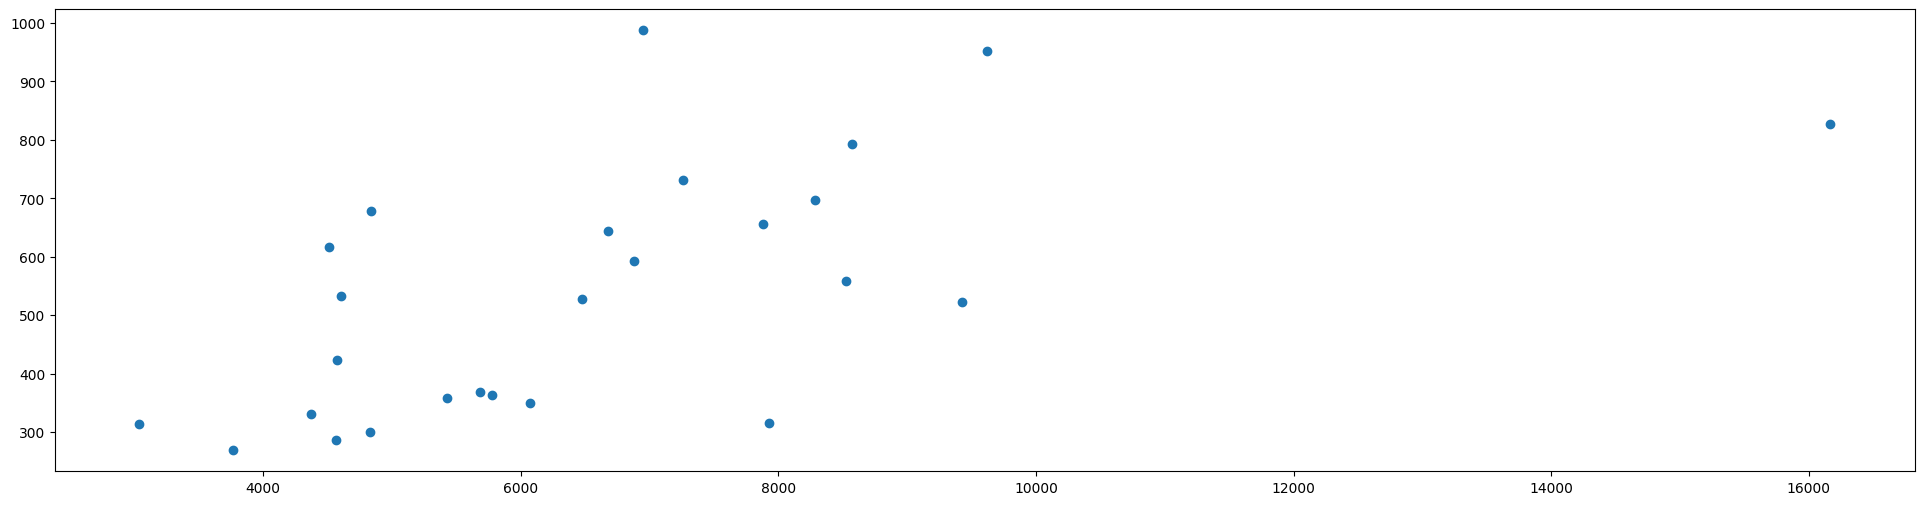

In [20]:
plt.figure(figsize=(24,6))
x=100000*(datos.POSITIVOS)/(datos.POBLACION)
y=100000*(datos.FALLECIDOS)/(datos.POBLACION)
plt.scatter(x, y)

In [21]:
datos.IDH.describe()

count    26.000000
mean      0.526731
std       0.087496
min       0.384000
25%       0.469250
50%       0.512500
75%       0.597500
max       0.722000
Name: IDH, dtype: float64

In [22]:
datos['NIVEL_IDH']=datos.apply(lambda row: 'Alto' if row.IDH>0.63 else ( 'Medio' if row.IDH>0.45 else 'Bajo'), axis=1)

In [23]:
datos['NIVEL_IDH']

AMAZONAS               Bajo
ANCASH                Medio
APURIMAC               Bajo
AREQUIPA               Alto
AYACUCHO               Bajo
CAJAMARCA              Bajo
CALLAO                 Alto
CUSCO                 Medio
HUANCAVELICA           Bajo
HUANUCO               Medio
ICA                   Medio
JUNIN                 Medio
LA LIBERTAD           Medio
LAMBAYEQUE            Medio
LIMA METROPOLITANA     Alto
LIMA REGION           Medio
LORETO                Medio
MADRE DE DIOS         Medio
MOQUEGUA               Alto
PASCO                 Medio
PIURA                 Medio
PUNO                  Medio
SAN MARTIN            Medio
TACNA                 Medio
TUMBES                Medio
UCAYALI               Medio
Name: NIVEL_IDH, dtype: object

In [24]:
colores=datos.apply(lambda row: 'red' if row.IDH>0.63 else ( 'orange' if row.IDH>0.45 else 'pink'), axis=1)

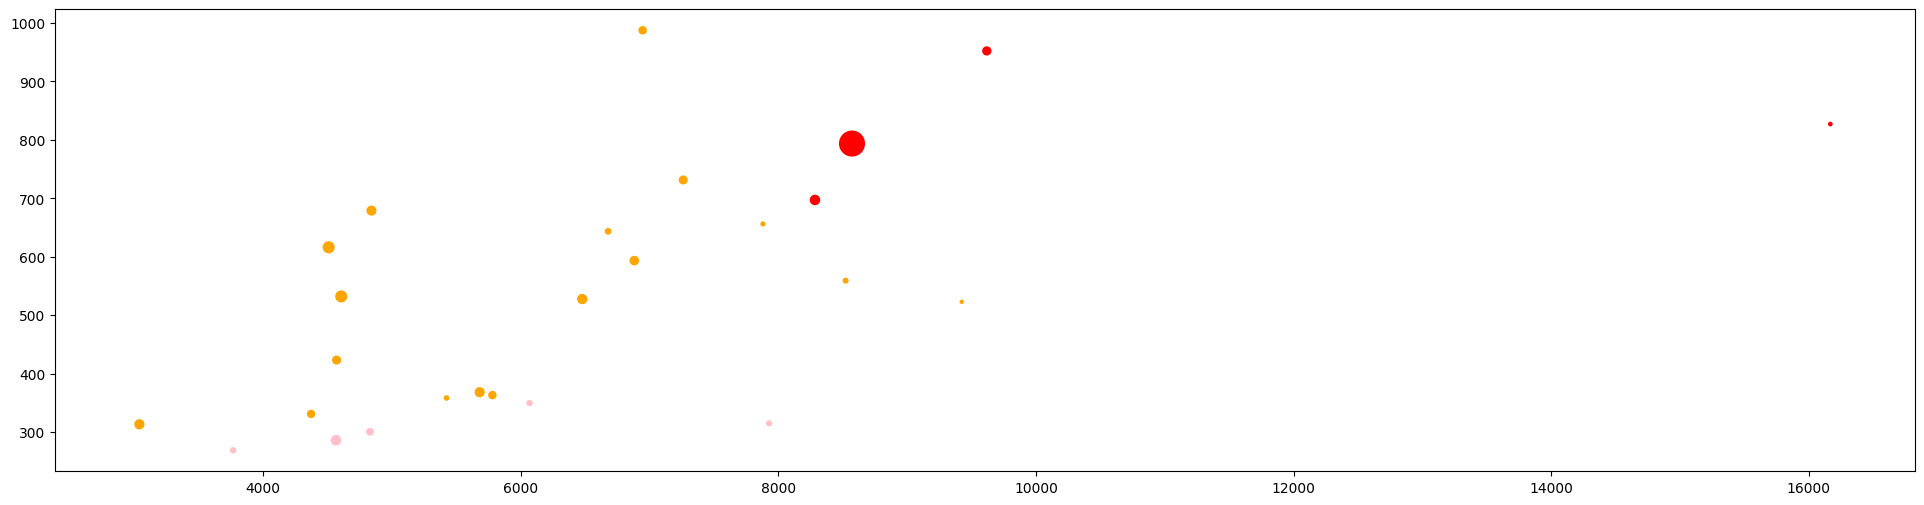

In [25]:
plt.figure(figsize=(24,6))
x=100000*(datos.POSITIVOS)/(datos.POBLACION)
y=100000*(datos.FALLECIDOS)/(datos.POBLACION)
s=1000*datos.POBLACION/datos.POBLACION.sum()
plt.scatter(x, y,s,color=colores)
plt.show()